# Klasyfikacja cyfr z użyciem MNIST i klasyfikatora SGD

W tym laboratorium zajmujemy się rozpoznawaniem cyfr na podstawie zbioru danych **MNIST**. Każda obserwacja to obrazek o wymiarach 28x28 pikseli przedstawiający pojedynczą cyfrę (0–9). Celem eksperymentu jest zbudowanie klasyfikatora, który będzie rozpoznawał, czy dana cyfra to **0** (klasyfikacja binarna), a następnie trenowanie klasyfikatora wieloklasowego.

Do budowy modelu wykorzystujemy:
- klasyfikator liniowy `SGDClassifier` z pakietu `sklearn`,
- podział danych na zbiór treningowy i testowy,
- walidację krzyżową,
- metryki takie jak dokładność i macierz pomyłek,

Dodatkowo, wizualizujemy wybrane dane wejściowe oraz porównujemy dokładność klasyfikacji na zbiorach treningowym i testowym.


## Import i wczytanie danych

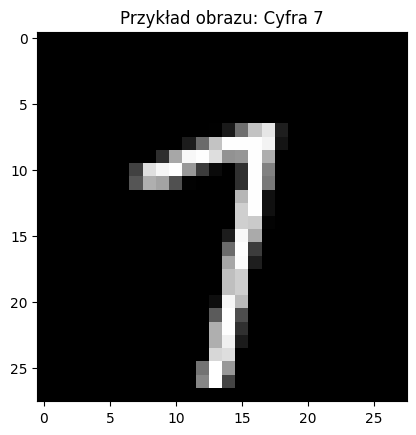

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 

In [1]:

from sklearn.datasets import fetch_openml
import numpy as np
from matplotlib import pyplot as plt

mnist = fetch_openml('mnist_784', version=1, as_frame=True)

# Podgląd jednej próbki
pixels = np.array(mnist.data.loc[42]).reshape(28, 28)
plt.imshow(pixels, cmap='gray')
plt.title("Przykład obrazu: Cyfra {}".format(mnist.target[42]))
plt.show()
print((pixels > 0).astype(int))


## Przygotowanie danych

In [2]:

X = mnist.data
y = mnist.target.astype(int)

# Sortowanie wg etykiety (dla eksperymentu)
y = y.sort_values(ascending=True)
X = X.reindex(y.index)

# Podział zbioru
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Konwersja do klasyfikacji binarnej: czy cyfra to 0?
y_train_0 = (y_train == 0).astype(int)
y_test_0 = (y_test == 0).astype(int)


## Trenowanie klasyfikatora SGD (klasyfikacja 0 vs reszta)

In [ ]:
from sklearn.linear_model import SGDClassifier
import time

start = time.time()
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)
print("Czas trenowania:", time.time() - start)

# Predykcje
y_train_0_pred = sgd_clf.predict(X_train)
y_test_0_pred = sgd_clf.predict(X_test)

# Dokładność
acc_train = sum(y_train_0 == y_train_0_pred) / len(y_train_0)
acc_test = sum(y_test_0 == y_test_0_pred) / len(y_test_0)
print("Dokładność (train):", acc_train)
print("Dokładność (test):", acc_test)


Czas trenowania: 4.094828367233276
Dokładność (train): 0.9782857142857143
Dokładność (test): 0.9745714285714285


## Walidacja krzyżowa

In [ ]:
from sklearn.model_selection import cross_val_score

start = time.time()
score = cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy", n_jobs=-1)
print("Czas walidacji:", time.time() - start)
print("Wyniki walidacji:", score)


Czas walidacji: 8.236279964447021
Wyniki walidacji: [0.98939305 0.98917876 0.9885353 ]


## Klasyfikacja wieloklasowa i macierz pomyłek

In [ ]:
sgd_m_clf = SGDClassifier(random_state=42, n_jobs=-1)
sgd_m_clf.fit(X_train, y_train)

# Predykcje
print("Predykcja 10 pierwszych próbek:", sgd_m_clf.predict(mnist.data.iloc[:10]))

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_m_clf, X_train, y_train, cv=3, n_jobs=-1)
conf_mx = confusion_matrix(y_train, y_train_pred)
print("Macierz pomyłek:", conf_mx)


Predykcja 10 pierwszych próbek: [5 0 4 1 9 2 1 3 1 4]
Macierz pomyłek: [[5380    1   17   15    3   21   23    6   71    1]
 [   3 5872   46   60   10   33   35   14  198   14]
 [  71   48 4758  242   60   40  106   59  204   13]
 [  45   12  117 5070   10  230   20   47  165   31]
 [  26   16   41   33 4865   25   52   31  230  139]
 [  92   17   33  336   60 3965  109   22  324   45]
 [  59   13   64    8   30   99 5120    5   77    2]
 [  26    9   86  137   57   24    5 5268   96  142]
 [  52   97   55  374   19  162   52   15 4597   32]
 [  50   12   34  227  249  100    2  234  616 4062]]
Macierz pomyłek: [[5380    1   17   15    3   21   23    6   71    1]
 [   3 5872   46   60   10   33   35   14  198   14]
 [  71   48 4758  242   60   40  106   59  204   13]
 [  45   12  117 5070   10  230   20   47  165   31]
 [  26   16   41   33 4865   25   52   31  230  139]
 [  92   17   33  336   60 3965  109   22  324   45]
 [  59   13   64    8   30   99 5120    5   77    2]
 [  26    

## Krótkie wnioski

1. SGD (0 vs reszta): wysoka dokładność — train = 0.978, test = 0.975. Wyniki CV: [0.98939305, 0.98917876, 0.9885353] (średnio 0.989).  
2. Przeuczenie: niewielkie (dokładność treningu nieznacznie wyższa niż testu).  
3. Najczęściej mylone cyfry: z macierzy pomyłek widoczne istotne błędy dla cyfr 8, 3, 5 i 9.  
4. Rekomendacje: skalowanie cech i dostrojenie hiperparametrów, analiza przykładów błędnych, rozważenie modeli konwolucyjnych (CNN) dla poprawy jakości.